Import all necessity packages

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Importing file data and visualisation

In [2]:
data_v1=pd.read_csv('BHARTIARTL.csv')
data_v1.head()


C:\Users\anjul\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,_id,sid,scriptname,scriptcode,value,sign,net_count,perc,high,low,...,cfl916_maxd30_fl916,change_mind30ltp_time,cfl916_mind30_fl916,change_maxs30ltp_time,cfl916_maxs30_fl916,change_mins30ltp_time,cfl916_mins30_fl916,level_position_flag,d30s30levelindex,change_flag_time
0,1.610000e+12,1613710000000,BHARTIARTL,10604,28774890.00,1,0,0.3,590.75,590.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN
1,1.610000e+12,1613710000000,BHARTIARTL,10604,37438038.00,1,0,0.3,590.85,590.00,...,0.0,2021-02-19T09:15:10.445Z,0.0,2021-02-19T09:15:10.445Z,0.0,2021-02-19T09:15:10.445Z,0.0,1,1,NaN
2,1.610000e+12,1613710000000,BHARTIARTL,10604,40689257.95,1,0,0.3,590.85,590.00,...,0.0,2021-02-19T09:15:10.445Z,0.0,2021-02-19T09:15:10.445Z,0.0,2021-02-19T09:15:10.445Z,0.0,1,1,NaN
3,1.610000e+12,1613710000000,BHARTIARTL,10604,45336491.75,-1,0,0.2,590.85,590.00,...,0.0,2021-02-19T09:15:12.271Z,0.0,2021-02-19T09:15:12.271Z,0.0,2021-02-19T09:15:10.445Z,0.0,4,4,NaN
4,1.610000e+12,1613710000000,BHARTIARTL,10604,57642206.97,-1,0,0.0,590.85,589.25,...,0.0,2021-02-19T09:15:13.083Z,0.0,2021-02-19T09:15:13.083Z,0.0,2021-02-19T09:15:10.445Z,0.0,4,4,NaN


In [3]:

len(data_v1.index)

21149

In [4]:
#removing row with fl916 data as Field!


data_v1=data_v1[data_v1.fl916 != '#FIELD!']
len(data_v1.index)

21148

In [5]:
data_v1.dtypes

_id                      float64
sid                        int64
scriptname                object
scriptcode                 int64
value                    float64
                          ...   
change_mins30ltp_time     object
cfl916_mins30_fl916      float64
level_position_flag        int64
d30s30levelindex           int64
change_flag_time         float64
Length: 157, dtype: object

In [9]:
#taking only valuable columns for first regression

data_v2= data_v1.filter(['sid','ltp','updatetime','pvr','volume','volumechange','fl916','net_count','m30exp'], axis=1)
data_v2['fl916']=data_v2['fl916'].astype(float)

data_v2.head()

,sid,ltp,updatetime,pvr,volume,volumechange,fl916,net_count,m30exp
0,1613710000000,590.75,2021-02-19T09:15:07.457Z,12.6,48771,48771,0.0,0,0.0
1,1613710000000,590.70,2021-02-19T09:15:10.445Z,9.4,63450,13409,0.0,0,0.0
2,1613710000000,590.70,2021-02-19T09:15:11.400Z,10.2,68959,5509,0.0,0,0.0
3,1613710000000,590.00,2021-02-19T09:15:12.271Z,7.2,76835,-7876,0.0,0,0.0
4,1613710000000,589.25,2021-02-19T09:15:13.083Z,9.2,97697,-20862,0.0,0,0.0


In [10]:
import datetime

In [25]:
data_v2['updatetime']=data_v2['updatetime'].astype(str)



dt_str= data_v2['updatetime'][0:9]
print(dt_str)

0    2021-02-19T09:15:07.457Z
1    2021-02-19T09:15:10.445Z
2    2021-02-19T09:15:11.400Z
3    2021-02-19T09:15:12.271Z
4    2021-02-19T09:15:13.083Z
5    2021-02-19T09:15:14.044Z
6    2021-02-19T09:15:14.608Z
7    2021-02-19T09:15:15.274Z
8    2021-02-19T09:15:15.681Z
Name: updatetime, dtype: object


In [21]:
print(data_v2.dtypes)

sid               int64
ltp             float64
updatetime       object
pvr             float64
volume            int64
volumechange      int64
fl916           float64
net_count         int64
m30exp          float64
dtype: object


In [26]:
#updatetime_obj=datetime.datetime.strptime(data_v2.updatetime.iloc[0,0], '%Y-%m-%d %H:%M:%S.%f')

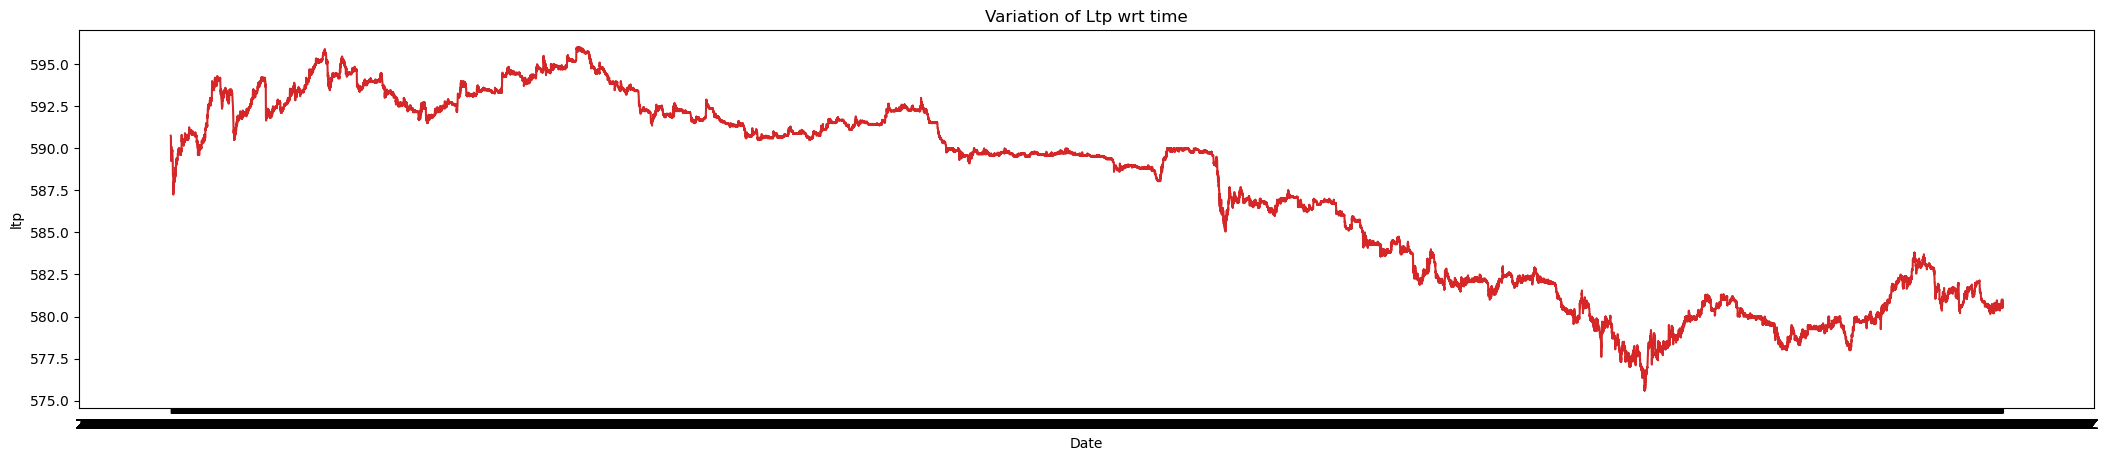

In [29]:
# Draw Plot
def plot_df(data_v2, x, y, title="", xlabel='Date', ylabel='ltp', dpi=100):
    plt.figure(figsize=(26,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    
    
plot_df(data_v2, x=data_v2.updatetime, y=data_v2.ltp, title='Variation of Ltp wrt time')    

<h3> Time series model - Mean Sd and original 

In [32]:
ts_data=data_v2.filter(['updatetime','ltp'])
ts_data

,updatetime,ltp
0,2021-02-19T09:15:07.457Z,590.75
1,2021-02-19T09:15:10.445Z,590.70
2,2021-02-19T09:15:11.400Z,590.70
3,2021-02-19T09:15:12.271Z,590.00
4,2021-02-19T09:15:13.083Z,589.25
...,...,...
21144,2021-02-19T15:29:55.033Z,580.55
21145,2021-02-19T15:29:56.016Z,580.95
21146,2021-02-19T15:29:57.006Z,580.50
21147,2021-02-19T15:29:58.174Z,580.95


In [45]:
#plt.plot(ts_data)
#ts_log = np.log(ts_data)
ts_np=ts_data.to_numpy()
#plt.plot(ts_np)

In [71]:
from statsmodels.tsa.stattools import adfuller
def stationary_ts(timeseries):
    
    #plt.plot(timeseries)
    #ts_log = np.log(timeseries)
    #plt.plot(ts_log)
    #Determing rolling statistics
    #rolmean = pd.rolling_mean(timeseries, window=12)
    rolmean = timeseries.rolling( window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    plt.figure(figsize=(26,5))
    orig = plt.plot(timeseries['updatetime'],timeseries['ltp'], color='red',label='Original')
    mean = plt.plot(rolmean, color='green', label='Rolling Mean')
    std = plt.plot(rolstd, color='blue', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    #plt.figure(figsize=(18,5))
    plt.show(block=False)
    
   


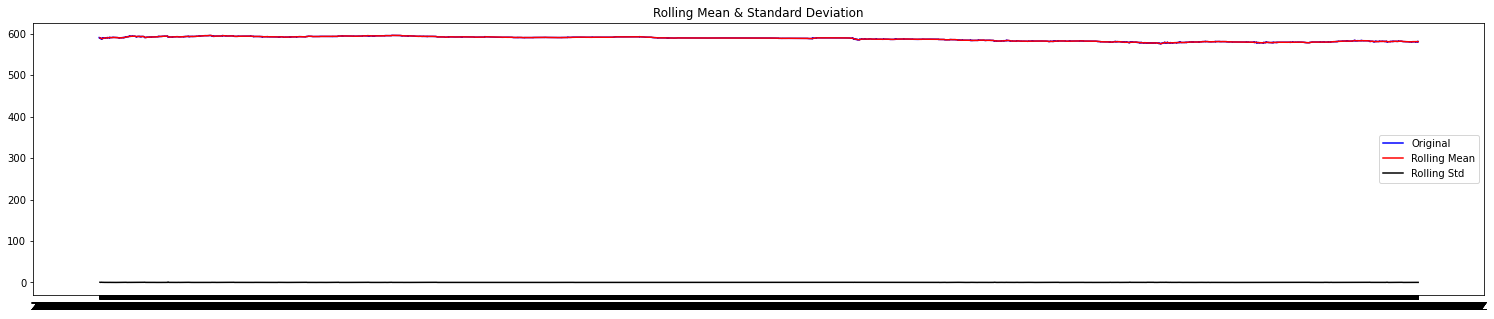

In [70]:
stationary_ts(ts_data)